<a href="https://colab.research.google.com/github/santhoshBjeeffy/Dog_Breed_classifier/blob/master/dogBreedclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#dependencies
from fastai import *
from  fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)


# we are going to train 6 types of dog breeds

1.pug

2.Bull dog

3.Labrador Reterviver

4.Beale

5.pomeranian

6.German shephard

In [0]:
classes=["pug","bulldog","labradorreterviver","beagle","pomeranian","germanshephard"]

In [0]:
'''#downloading the images
for folder in classes:
  folder=folder
  path=Path('/content/drive/My Drive/Colab Notebooks/Fast.ai_assignments/move')
  dest=path/folder
  file= folder+'.txt'
  download_images(path/file, dest, max_pics=200)
  '''

"#downloading the images\nfor folder in classes:\n  folder=folder\n  path=Path('/content/drive/My Drive/Colab Notebooks/Fast.ai_assignments/move')\n  dest=path/folder\n  file= folder+'.txt'\n  download_images(path/file, dest, max_pics=200)\n  "

In [0]:
#download_images(path/file, dest, max_pics=200)


In [0]:
#Verifying the images¶
#Sometimes the image we download could be broken, so it is a good practice to verify them first otherwise it will lead to an error.
#/content/drive/My Drive/Colab Notebooks/Fast.ai_assignments/Lesson 2/dog
path=Path('/content/drive/My Drive/Colab Notebooks/Fast.ai_assignments/move')

for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)
  

pug


bulldog


labradorreterviver


beagle


pomeranian


germanshephard


In [0]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train="",valid_pct=0.2,
                                ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)


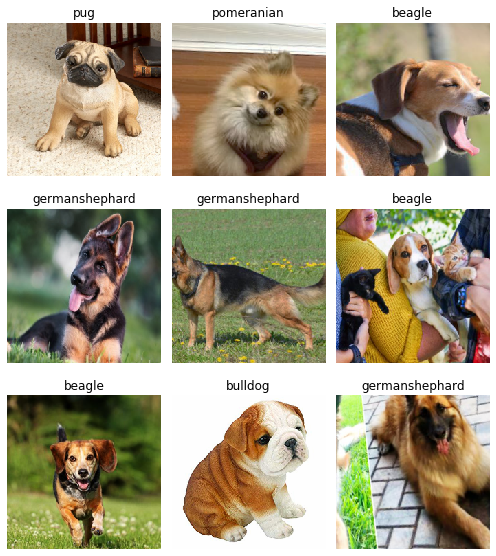

In [0]:
data.show_batch(rows=3,figsize=(7,8))

In [0]:
len(data.valid_ds),len(data.train_ds)

(225, 902)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 58.2MB/s]


In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.294211,0.088887,0.031111,00:13
1,0.671919,0.137430,0.040000,00:13
2,0.456858,0.189379,0.053333,00:13
3,0.329610,0.197186,0.040000,00:13
4,0.258470,0.191346,0.035556,00:13


In [0]:
learn.save('dog_classifier-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


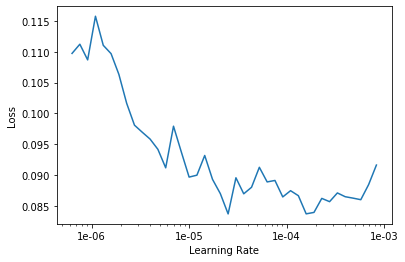

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2,max_lr=slice(3e-6,3e-4))  #0.000563 = 5.63E-3

epoch,train_loss,valid_loss,error_rate,time
0,0.098038,0.190874,0.044444,00:13
1,0.086969,0.185446,0.048889,00:13


In [0]:
learn.save('dog_classifier-1unfreeze')

In [0]:
from fastai.widgets import *


In [0]:
db = (ImageList.from_folder(path)
     .split_none()
     .label_from_folder()
     .transform(get_transforms(),size=224)
      .databunch()
     )

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
#ImageCleaner(ds, idxs,path)


In [0]:
db = (ImageList.from_csv(path, 'cleaned.csv', folder='.').split_by_rand_pct(0.2)
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch()
      )



In [0]:
learn = cnn_learner(db,models.resnet34,metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.577423,0.276131,0.088889,00:10
1,0.811107,0.271179,0.072222,00:10
2,0.523792,0.266510,0.066667,00:10
3,0.389034,0.241556,0.066667,00:10


In [0]:
learn.save('Dog-classifier1')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.204514,0.497935,0.116667,00:10
1,0.245888,0.334321,0.094444,00:10


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


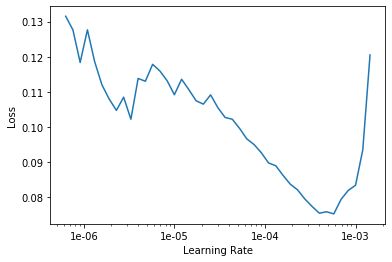

In [0]:
learn.load('Dog-classifier1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
#/content/drive/My Drive/Colab Notebooks/Fast.ai_assignments
import os
cwd = os.getcwd()
print(cwd)

/content


In [0]:
learn.fit_one_cycle(2,max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.249120,0.997022,0.183333,00:10
1,0.290888,0.522768,0.094444,00:10


In [0]:
learn.save('dog-classifier-unfreeze1')

In [0]:
learn.load('Dog-classifier1')

Learner(data=ImageDataBunch;

Train: LabelList (722 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pug,pug,pug,pug,pug
Path: /content/drive/My Drive/Colab Notebooks/Fast.ai_assignments/move;

Valid: LabelList (180 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bulldog,bulldog,beagle,bulldog,labradorreterviver
Path: /content/drive/My Drive/Colab Notebooks/Fast.ai_assignments/move;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


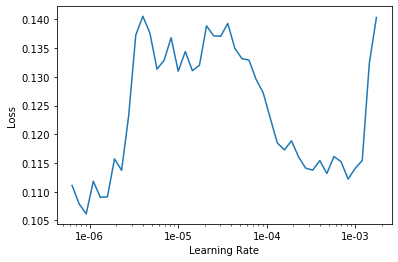

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8, max_lr= slice(3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.127601,0.241418,0.072222,00:10
1,0.156322,0.451046,0.094444,00:10
2,0.203625,0.870478,0.127778,00:10
3,0.223601,1.041154,0.133333,00:10
4,0.199705,0.335995,0.066667,00:10
5,0.179992,0.336667,0.083333,00:11
6,0.157632,0.298152,0.066667,00:11
7,0.129391,0.274147,0.061111,00:11


In [0]:
learn.save('dog-classifier-1_Best')

In [0]:
learn.export()
'''# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'decision_tree_classifier_20170212.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(decision_tree_model, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()
'''

"# Dump the trained decision tree classifier with Pickle\ndecision_tree_pkl_filename = 'decision_tree_classifier_20170212.pkl'\n# Open the file to save as pkl file\ndecision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')\npickle.dump(decision_tree_model, decision_tree_model_pkl)\n# Close the pickle instances\ndecision_tree_model_pkl.close()\n"

In [0]:
'''import pickle

dogclassifier= 'imageclassification_20190921.pkl'
dogbreedclassifier=open(imageclassification_20190921, 'wb')
pickle.dump(Dog-classifier1_Best,dogbreedclassifier)
dogbreedclassifier.close()
'''

"import pickle\n\ndogclassifier= 'imageclassification_20190921.pkl'\ndogbreedclassifier=open(imageclassification_20190921, 'wb')\npickle.dump(Dog-classifier1_Best,dogbreedclassifier)\ndogbreedclassifier.close()\n"